# PCA
1. 표준화
2. 공분산 행렬
3. 공분산 행렬의 고유값, 고유벡터
3. 고유값을 내림차순으로 정렬하고 고유벡터의 순위를 매김

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data', header = None)

### 1. 표준화

In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

# 1) standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### 2. 공분산 행렬

In [3]:
import numpy as np

cov_mat = np.cov(X_train_std.T)

### 3. 공분산 행렬의 고유값, 고유벡터

In [6]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(f"고유값 : {eigen_vals}")
# 13x13 차원의 공분산 행렬이어서 고유값은 13개가 나온다.

고유값 : [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


### 고유값들의 분산 비율

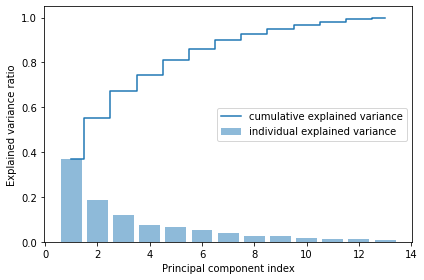

In [7]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center',
        label = 'individual explained variance')
plt.step(range(1, 14), cum_var_exp, where = 'mid',
         label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 4. 고유값을 내림차순으로 고유 벡터와 고유값의 쌍 정렬

In [9]:
# tuple list (eigen value, eigen vector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# 높은 값에서 낮은 값으로 (고유값, 고유벡터) 튜플 정렬
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

### 5. 정렬된 고유벡터로 13 x n 차원의 투영 행렬
- 아래의 예시에서는 2개만 선택 -> 2차원

In [10]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print(f"투영 행렬 : {w}")

투영 행렬 : [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


### 6. 기존 벡터와 선형 결합

In [12]:
X_train_pca = X_train_std.dot(w)

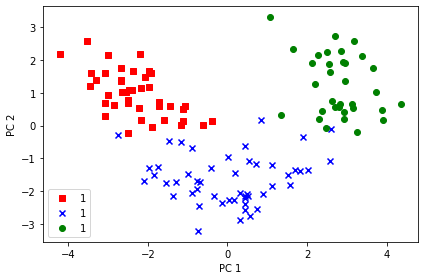

In [18]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c = c, label = 1, marker = m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

# scikit-learn PCA

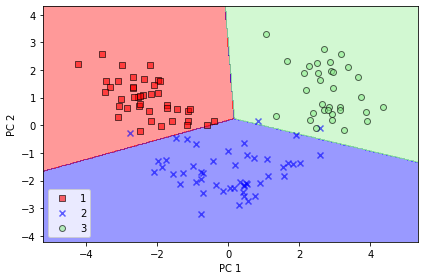

In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha = 0.6, c = cmap.colors[idx], edgecolor = 'black',
                    marker = markers[idx], label = cl)
        
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

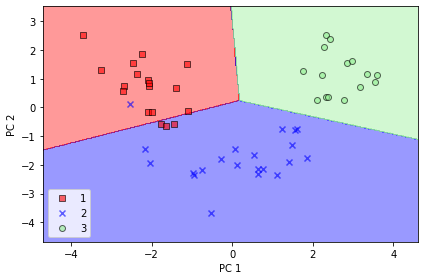

In [21]:
plot_decision_regions(X_test_pca, y_test, classifier = lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

In [22]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

# LDA
1. 데이터 표준화 (standardization)
2. 각 클래스에 대해 n 차원의 평균 벡터 계산 (지도 학습)
3. 클래스 간의 scatter matrix (Sb), 클래스 내의 scatter matrix (Sw) 계산
4. Sw 역행렬 * Sb 행렬의 고유벡터와 고유값 계산
5. 고유값을 내림차순으로 정렬하고 고유벡터의 순위를 매김
6. 고유값이 가장 큰 k개의 고유벡터를 선택하여 n x k 차원의 변환 행렬 구성
7. 정렬된 고유벡터로 기존 변수 변환 (선형 결합)

### 1. 데이터 표준화 (standardization)

In [23]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

# 1) standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### 2. 각 클래스에 대해 n 차원의 평균 벡터 계산 (지도 학습)
- 평균벡터 : $m_{i} = \frac{1}{n_{i}} \sum_{x \in D_{i}}^{c}x_{m}$

In [33]:
# 예제 데이터에서는 3개의 클래스를 가지고 있다. (1, 2, 3)
np.set_printoptions(precision = 4)
mean_vecs = []
for label in range(1, 4):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis = 0))
    print(f"MV {label} : {mean_vecs[label - 1]}")

MV 1 : [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
MV 2 : [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
MV 3 : [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]


### 3. 클래스 간의 scatter matrix (Sb), 클래스 내의 scatter matrix (Sw) 계산
- 위의 평균벡터를 사용하여 클래스 내 산포 행렬
- $S_{w} = \sum_{i = 1}^{c}S_{i}$
- $S_{i} = \sum_{x \in D_{i}}^{c}(x-m_{i})(x-m_{i})^{T}$

In [34]:
# 클래스 내의 scatter matrix
d = 13 # feature 개수
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter
print(f"클래스 내의 산포 행렬 : {S_W.shape[0]}x{S_W.shape[1]}")

클래스 내의 산포 행렬 : 13x13


#### 산포 행렬을 계산할 때, 클래스 레이블이 균등하다고 가정한다.
- 개별 산포 행렬 Si를 더하기 전에 스케일 조정한다.
- 산포 행렬을 클래스 샘플 개수로 나누면 이는 공분산 행렬과 같다.
##### 공분산 행렬은 산포 행렬의 정규화 버전이다.

In [35]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T, bias = True)
    S_W += class_scatter
    
print(f"클래스 내의 산포 행렬 : {S_W.shape[0]}x{S_W.shape[1]}")

클래스 내의 산포 행렬 : 13x13


### 3 - 1 클래스 간의 scatter matrix (Sb)
- $S_{B} = \sum_{i = 1}^{c}n_{i}(m_{i} - m)(m_{i} - m)^{T}$
- m : 전체 평균

In [38]:
mean_overall = np.mean(X_train_std, axis = 0)
mean_overall = mean_overall.reshape(d, 1)
d = 13
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
    
print(f"클래스 간의 산포 행렬 : {S_B.shape[0]}x{S_B.shape[1]}")

클래스 간의 산포 행렬 : 13x13


### 4. Sw 역행렬 * Sb 행렬의 고유벡터와 고유값 계산

In [39]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

### 5. 고유값을 내림차순으로 정렬하고 고유벡터의 순위를 매김

In [40]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)
print('내림차순의 고유값')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

내림차순의 고유값
358.0042070133659
177.07768640666228
4.275371314190048e-14
3.231466712903264e-14
2.842170943040401e-14
1.848322734153356e-14
1.848322734153356e-14
1.217362373672397e-14
1.217362373672397e-14
1.1794926750876599e-14
7.133477893476664e-15
7.133477893476664e-15
4.4933654353250745e-15


- LDA에서 선형 판별 벡터는 최대 c - 1개이다. (c : 클래스 레이블 개수)

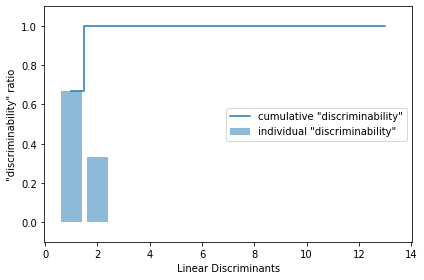

In [41]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse = True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 14), discr, alpha = 0.5, align = 'center', label = 'individual "discriminability"')
plt.step(range(1, 14), cum_discr, where= 'mid', label = 'cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [43]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
               eigen_pairs[1][1][:, np.newaxis].real))
print('행렬 W', w)

행렬 W [[-0.1484 -0.4093]
 [ 0.091  -0.1583]
 [-0.0168 -0.3536]
 [ 0.1487  0.322 ]
 [-0.0165 -0.0813]
 [ 0.1912  0.0841]
 [-0.7333  0.2828]
 [-0.0751 -0.0099]
 [ 0.002   0.0902]
 [ 0.2953 -0.2168]
 [-0.0327  0.274 ]
 [-0.3539 -0.0133]
 [-0.3918 -0.5954]]


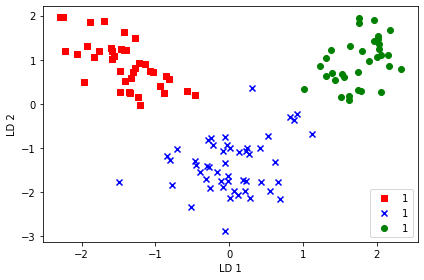

In [44]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1]*(-1),
                c = c, label = 1, marker = m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

# scikit-learn LDA

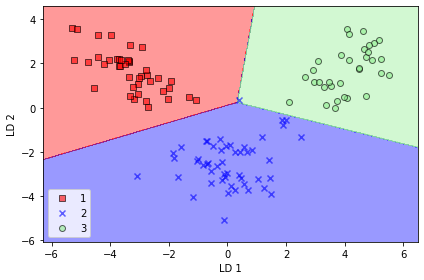

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

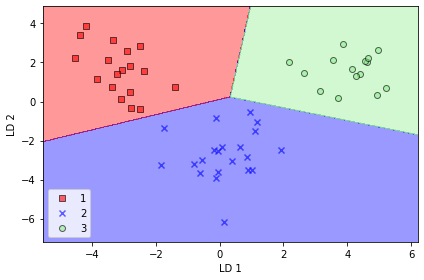

In [47]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

# kernel method

### kernel PCA (RBF)

In [48]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    '''
    hyperparameter
    X : {numpy ndarray}, shape = [n_samples, n_features]
    gamma : float RBF 커널 튜닝 매개변수
    n_components : int 반환할 주성분 개수
    
    return
    X_pc : 투영된 데이터셋
    '''
    # M x N 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱 계산
    sq_dists = pdist(X, 'sqeuclidean')
    
    # 샘플 간의 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)
    
    # 커널 행렬 계산
    K = exp(-gamma * mat_sq_dists)
    
    # 커널 행렬을 중앙에 맞춤
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 중앙에 맞춰진 커널 행렬의 고유값과 고유벡터를 구함
    # scipy.linalg.eigh 함수는 오름차순 반환
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # 최상위 k개의 고유 벡터를 선택 (투영결과)
    X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])
    
    return X_pc

### ex) 반달모양 구분

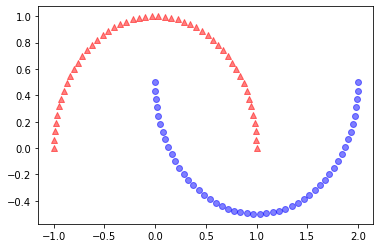

In [49]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()

### PCA

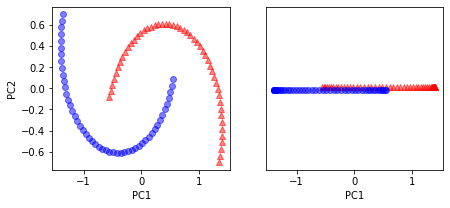

In [53]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1))+0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1))-0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

### Kernel PCA

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


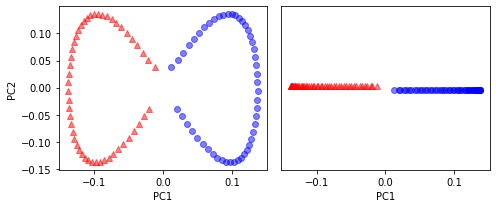

In [55]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)

fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50, 1))+0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50, 1))-0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

### ex) 동심원 분리

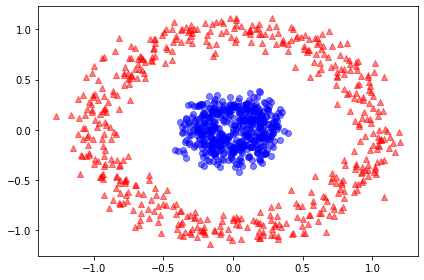

In [56]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.tight_layout()
plt.show()

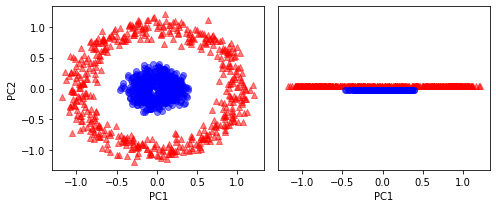

In [58]:
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1))+0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1))-0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()

c:\users\xnoti\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


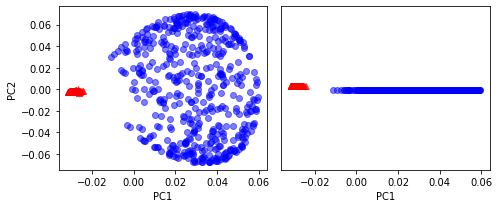

In [59]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)

fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1))+0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1))-0.02, color = 'blue', marker = 'o', alpha = 0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()